In [16]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import csv
import sys
sys.path.append("..")

from Code.VQLSSVM import VQLSSVM
from Code.Utils import prepareDataset

np.set_printoptions(precision=4, suppress=True)

In [17]:
qubits = 3
shots: int = 10000
gamma: float = 0.01 # regularization parameter
subsetSize: int = 2**qubits - 1 # number of training points
classToFilterOut: int = 2

In [31]:
xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="breastCancer",subsetSize=subsetSize, classToFilterOut=classToFilterOut)
print(xTrain)
print(yTrain)

# VQLS-LSSVM state vectors

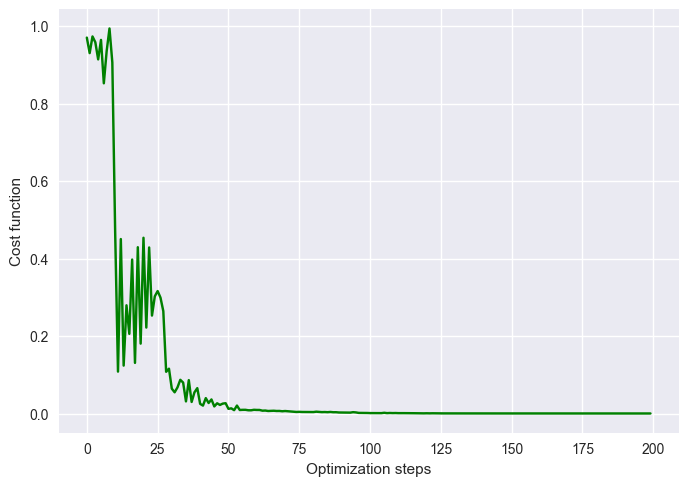

In [29]:
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmVectors.train(xTrain, yTrain, quantumSimulation=False, verbose=True, iterations = 200, method="COBYLA", threads=4, jobs=10, circuitConstructionThreading=True)
vqlssvmVectors.plotCost()

In [30]:
print(vqlssvmVectors.predict(xTest))

In [20]:
print("Accuracy:",vqlssvmVectors.accuracy(xTest, yTest))

# VQLS-LSSVM quantum

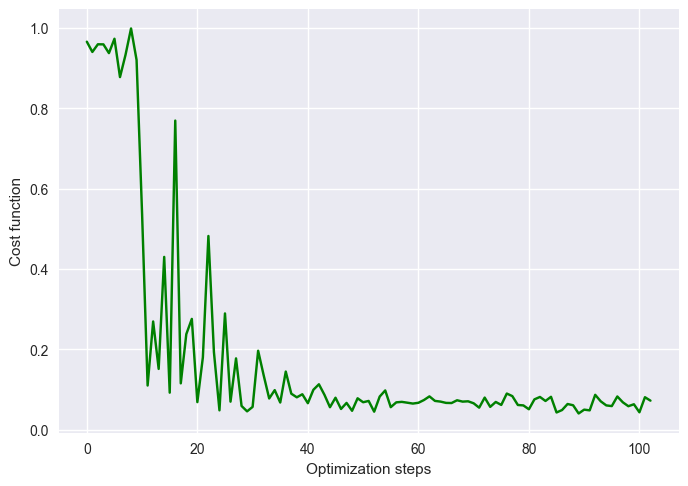

In [21]:
vqlssvmQuantum: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmQuantum.train(xTrain, yTrain, quantumSimulation=True, verbose=True, iterations = 200, threads=4, jobs=10, circuitConstructionThreading=True)

vqlssvmQuantum.plotCost()

In [26]:
costCOBYLA = vqlssvmQuantum.getCostHistory()

with open('../SimulationResults/costCOBYLA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Iteration', 'CostFunction'])
    for i in range(len(costCOBYLA)):
        writer.writerow([i, costCOBYLA[i]])


In [27]:
print("Predictions:\n", vqlssvmQuantum.predict(xTest))
print("Accuracy: ", vqlssvmQuantum.accuracy(xTest, yTest))

# LSSVM (work in progresss)

In [24]:
# lssvmMatrix1: np.ndarray = lssvmMatrix(xTrain, gamma, "linearKernel")
# yVector: np.array = prepareLabels(yTrain)
# print(yVector)
# print ("Condition number of the matrix: ", np.linalg.cond(lssvmMatrix1))
# print("LS-SVM Matrix:\n", lssvmMatrix1)
# print(yVector)

# solution: np.array = np.linalg.solve(lssvmMatrix1, yVector)
# print("Solution:", solution)
# print ("Norm of the solution: ",solution/np.linalg.norm(solution))

# bias: float = solution[0]
# weights: np.array = solution[1:]

# vqlssvmLSSVM: VQLSSVM = VQLSSVM(gamma,10)
# vqlssvmLSSVM.xTrain = xTrain
# vqlssvmLSSVM.xTrainSize = xTrain.shape[0]
# vqlssvmLSSVM.weights = weights
# vqlssvmLSSVM.b = bias
# predictions: np.array = vqlssvmLSSVM.predict(xTest)
# classVals = [vqlssvmLSSVM.assignClass(i) for i in predictions]
# print("Predictions:", predictions)
# print("Class values:", classVals)
# print("yTest:", yTest)
# # print(yTest)
# print("Accuracy:", vqlssvmLSSVM.accuracy(xTest, yTest))

# Classical SVM

In [28]:
clf = SVC(kernel='linear')
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)
print("Accuracy:", accuracy_score(yTest, yPred))